In [1]:
import nltk 
import random 
from nltk.classify.scikitlearn import SklearnClassifier 
import pickle 
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier 
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI 
from statistics import mode 
from nltk.tokenize import word_tokenize 
import re 
import os 

In [2]:
files_pos = os.listdir('acl-imdb-v1/train/pos') 
files_pos = [open('acl-imdb-v1/train/pos/'+f,'r',encoding = 'utf8').read() for f in files_pos] 
files_neg = os.listdir('acl-imdb-v1/train/neg') 
files_neg = [open('acl-imdb-v1/train/neg/'+f,'r',encoding = 'utf8').read() for f in files_neg] 


In [3]:
len(files_pos),len(files_neg) 

(12500, 12500)

In [4]:
files_pos = files_pos[0:1000] 
files_neg = files_neg[0:1000] 

In [5]:
len(files_pos),len(files_neg) 

(1000, 1000)

In [6]:
from nltk.corpus import stopwords
stop_words = list(set(stopwords.words('english')))

In [7]:
all_words  = []
documents = []

allowed_words_types = ["J"]
for p in files_pos:
    documents.append( (p, "pos") )
    cleaned = re.sub(r'[^(a-zA-Z)\s]','',p)
    tokenized = word_tokenize(cleaned)
    stopped = [w for w in tokenized if not w in stop_words]
    pos = nltk.pos_tag(stopped)
    for w in pos :
        if w[1][0] in allowed_words_types:
            all_words.append(w[0].lower())

for p in files_neg:
    documents.append( (p, "neg") )
    cleaned = re.sub(r'[^(a-zA-Z)\s]','',p)
    tokenized = word_tokenize(cleaned)
    stopped = [w for w in tokenized if not w in stop_words]
    pos = nltk.pos_tag(stopped)
    for w in pos :
        if w[1][0] in allowed_words_types:
            all_words.append(w[0].lower())
            

In [8]:
all_words = nltk.FreqDist(all_words)
all_words

FreqDist({'good': 1157, 'bad': 743, 'great': 660, 'much': 482, 'little': 482, 'many': 480, 'first': 374, 'best': 357, 'real': 317, 'br': 302, ...})

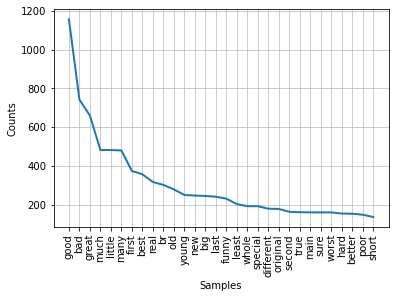

In [9]:
import matplotlib.pyplot as plt
all_words.plot(30,cumulative = False)
plt.show()

In [11]:
word_features = list(all_words.keys())[:1000]

In [12]:
def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)
    return features

In [13]:
featuresets = [(find_features(rev), category) for (rev, category) in documents]
random.shuffle(featuresets)

train_set = featuresets[:800]
test_set = featuresets[800:]

In [14]:
featuresets[1]

({'scramble': False,
  'insightful': False,
  'right': True,
  'pathetic': False,
  'pettiness': False,
  'whole': True,
  'episode': False,
  'burn': False,
  'classic': False,
  'many': True,
  'human': False,
  'most': False,
  'next': False,
  'live': False,
  'wall': False,
  'br': True,
  'rich': False,
  'bet': False,
  'future': False,
  'thrown': False,
  'cant': False,
  'nickname': False,
  'forehead': False,
  'mutual': False,
  'love': False,
  'necessary': False,
  'observant': False,
  'slapstick': False,
  'valuable': False,
  'stupid': False,
  'brilliant': False,
  'dramatic': False,
  'second': False,
  'good': False,
  'dishonest': False,
  'funny': False,
  'fantastic': False,
  'crush': False,
  'usual': False,
  'hospital': False,
  'invade': False,
  'alltime': False,
  'legs': False,
  'big': False,
  'better': False,
  'underrated': False,
  'realistic': False,
  'flat': False,
  'lovable': False,
  'impressive': False,
  'much': True,
  'typical': False,
  'f

In [15]:
classifier = nltk.NaiveBayesClassifier.train(train_set)
print("Accuracy: ",(nltk.classify.accuracy(classifier, test_set))*100)
classifier.show_most_informative_features(15)

Accuracy:  74.5
Most Informative Features
           disappointing = True              neg : pos    =      8.3 : 1.0
                  superb = True              pos : neg    =      7.8 : 1.0
                    weak = True              neg : pos    =      7.4 : 1.0
                  impact = True              pos : neg    =      7.0 : 1.0
               beautiful = True              pos : neg    =      6.9 : 1.0
            unbelievable = True              neg : pos    =      6.3 : 1.0
                unlikely = True              pos : neg    =      5.7 : 1.0
                 teenage = True              neg : pos    =      5.6 : 1.0
                romantic = True              pos : neg    =      5.6 : 1.0
                powerful = True              pos : neg    =      5.4 : 1.0
                 likable = True              pos : neg    =      5.0 : 1.0
                provided = True              pos : neg    =      5.0 : 1.0
                  bottom = True              neg : pos    

In [17]:
MNB = SklearnClassifier(MultinomialNB())
mnb_classifier = MNB.train(train_set)
print("Accuracy: ",(nltk.classify.accuracy(mnb_classifier, test_set))*100)

Accuracy:  75.25


In [18]:
BERN = SklearnClassifier(BernoulliNB())
bern_classifier = BERN.train(train_set)
print("Accuracy: ",(nltk.classify.accuracy(bern_classifier, test_set))*100)

Accuracy:  74.25


In [19]:
LogReg = SklearnClassifier(LogisticRegression())
logReg_classifier = LogReg.train(train_set)
print("Accuracy: ",(nltk.classify.accuracy(logReg_classifier, test_set))*100)

Accuracy:  73.33333333333333


In [20]:
SGD = SklearnClassifier(SGDClassifier())
sgd_classifier = SGD.train(train_set)
print("Accuracy: ",(nltk.classify.accuracy(sgd_classifier, test_set))*100)

Accuracy:  69.58333333333333


In [21]:
SVC = SklearnClassifier(SVC())
svc_classifier = SVC.train(train_set)
print("Accuracy: ",(nltk.classify.accuracy(svc_classifier, test_set))*100)

Accuracy:  73.08333333333333
